In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg

#Read in the dataset which contains both training and test data
Task1_ds = pd.read_csv('Task1 - dataset - pol_regression(1).csv') 

Task1_ds

# made this into a dataframe so we can use some functions specific to dataframes




Unnamed: 0         x           y
0            0  0.507979    2.238321
1            1  2.081478  -13.104269
2            2 -2.090953  -10.895881
3            3  0.108276   -1.580098
4            4  3.929470    9.174928
5            5  3.962931    3.237086
6            6 -3.744147  -72.556875
7            7 -2.927571  -29.934683
8            8 -4.485328 -125.275943
9            9 -0.591902    1.586948
10          10 -4.701238 -155.192926
11          11 -0.431668    0.737940
12          12  1.491440   -3.133557
13          13 -2.215127    2.772584
14          14  1.762549  -13.629526
15          15  0.908628   -7.818825
16          16 -4.760181 -162.084241
17          17  0.588541  -15.192640
18          18 -2.407476  -15.690391
19          19 -0.848988   -2.259106

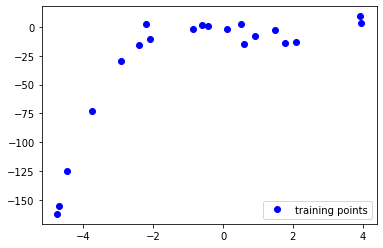

In [7]:
#Get the training data as numpy arrays
x_train = Task1_ds['x'].values 
y_train = Task1_ds['y'].values

plt.clf()
plt.plot(x_train, y_train, 'bo')

plt.legend(('training points', 'ground truth'))
plt.savefig('trainingdata.png')
plt.show()

In [8]:
#a function that does the feature expansion up to a certain degree for a given data set x.plt.show()
def getPolynomialDataMatrix(x, degree):#Feature expansion
    Fe_espan = np.ones(x.shape)
    for i in range(1,degree + 1):# The rangle function is exclusive so by adding +1 we make sure to add the last value as well
        Fe_espan = np.column_stack((Fe_espan, x ** i))#This is stacking and multiplying each x value from x_train by itself to the power of 
    return Fe_espan# 1 then 2, then 3 and then 4
    #read across from left to right
#print(getPolynomialDataMatrix(x_train, 0))# example testign this works prints the data matrices up to the fourth degree

In [9]:
#Polynomial regerssion using feqature expansion

#based on Exercise 3 of workshop

#A function that computes optimum beta values given an input x and output y and the desired degree
def pol_regression(features_train,y_train,degree):#This is the polynomial regression function
    #for the 0 degree polynomial
    if degree != 0:
        #calls the funtion for feature expansion to generate a data matrix
        dmatrix = getPolynomialDataMatrix(features_train, degree)
        # define dmatrix_dT as dmatrix * dmatrix (transposed), times is smybolised with underscore " _" and transpose as "T"
        dmatrix_dT =  dmatrix.transpose().dot(dmatrix)
        #get weigts from new training data otherwise, parameters of the polynomial
        parameters = linalg.solve(dmatrix_dT,dmatrix.transpose().dot(y_train))
        
        return parameters
    else:
        return [np.mean(y_train)] 

In [10]:
def eval_pol_regression(parameters, x , y, degree):
        #for the 0 degree polynomial
    if degree != 0:
        dmatrix =  getPolynomialDataMatrix(x, degree).dot(parameters)    
    else:
        #if the degree is 0 then we need to multiple rather than dot multiply
        dmatrix = getPolynomialDataMatrix(x, degree) * parameters  
    #rsme is implemented excatly as it sounds root-mean-square
    rsme = np.sqrt(np.mean(np.square(np.subtract(dmatrix,y))))
    return rsme

In [11]:
#Write a function to choose the polynomial to set "using categorical variables"
l_s = np.linspace(-5,5)
#one array to represent degree and colour
degreeMatrixColour = ['r','b','g','y','m','c','b','b','w','p']

# plot function for effeciency

def plot (w,degree): # requires 2 inputs
    #test

    #train
    plt.plot(x_train,y_train, 'bo')
    #limit y axis to 250 and redraw degree 10
    axes = plt.gca()
    axes.set_ylim([-250,50])

    #use a loop to get the colours and dindex to fit on each plot and draw polynomial based on chosen polynomial

    for index, i in np.ndenumerate(degreeMatrixColour): # i represents index here
        if degree !=0:# when the index in the array is the same as the degree chosen if degree == index and degree != 0
            
            plt.plot(l_s, getPolynomialDataMatrix(l_s,degree).dot(w), 'g')
        else:
            plt.plot(l_s, getPolynomialDataMatrix(l_s, degree) * w, 'g')
    print(degree,i)#checking the degree and colur of each plot    
    plt.legend(('Ground truth', 'Training data', '$x^{'+str(degree)+'}$'), loc = 'lower right')
    plt.show()

        


0 p


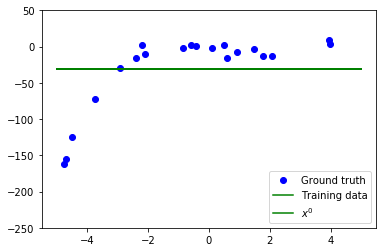

1 p


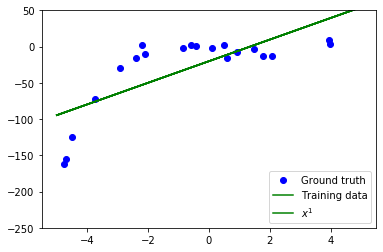

2 p


3 p


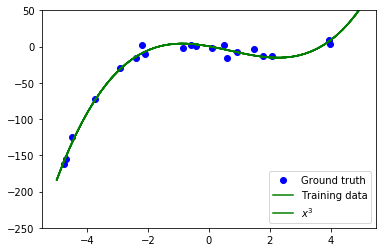

6 p


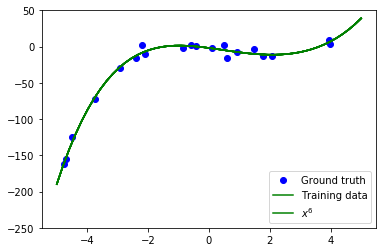

10 p


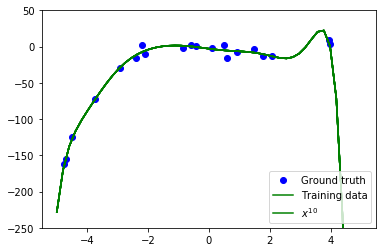

In [12]:
#regress dataset and then plot 
degrees = np.array([0,1,2,3,6,10])
for i in degrees:
    w =  pol_regression(x_train, y_train, i)
    plot (w, i) 
# evaluate pol-regression and then plot
    #eval_pol_regression(w, x_test, y_test, i)
    #plot (w, i) 

In [13]:
#shuffle dataset using pandas
shuffled_df = Task1_ds.sample(frac=1, random_state=1)
#set train size
training_size = int(0.7 *len(Task1_ds)) # 70% training size and 30% test set
#split into training and testing data

#split data with pandas into two separate vectors
train_set = shuffled_df[:training_size] 
test_set = shuffled_df[training_size:]

x_train = train_set['x'].values# out of the training only shuffled set that i have, x train is...
y_train = train_set['y'].values

x_test = test_set['x'].values #out of the test only shuffled set that i have, x test is...
y_test = test_set['y'].values

#train_set, test_set #testing that these work


array([2.74570718e-12])

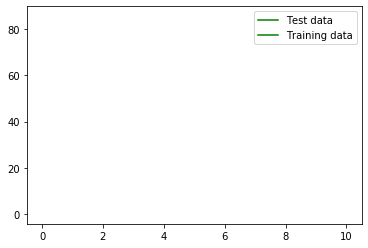

In [14]:
#Tried to make this more effecient
#regress dataset and then plot 
degrees = np.array([0,1,2,3,6,10])
test_eval_array = np.array([])
train_eval_array = np.array([])
for i in degrees:
    w =  pol_regression(x_test, y_test, i)
# evaluate pol-regression and then plot
    test_eval = eval_pol_regression(w, x_test, y_test, i)
    train_eval = eval_pol_regression(w, x_train, y_train, i)
    
    #create an array to join each new pol_eval to
    
    ntest_eval_array = np.append(test_eval_array, test_eval)
    ntrain_eval_array = np.append(train_eval_array, train_eval)
    
    plt.plot([degrees], [ntest_eval_array], 'g')
    plt.plot([degrees], [ntrain_eval_array], 'r')
    plt.legend(('Test data', 'Training data'), loc = 'upper right')
ntest_eval_array

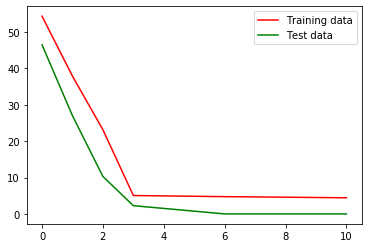

In [15]:
#Task 3
#shuffle dataset using pandas
shuffled_df = Task1_ds.sample(frac=1, random_state=1)
#set train size
training_size = int(0.7 *len(Task1_ds)) # 70% training size and 30% test set
#split into training and testing data

#split data with pandas into two separate vectors
train_set = shuffled_df[:training_size] 
test_set = shuffled_df[training_size:]

x_train = train_set['x'].values# out of the training only shuffled set that i have, x train is...
y_train = train_set['y'].values

x_test = test_set['x'].values #out of the test only shuffled set that i have, x test is...
y_test = test_set['y'].values

#train_set, test_set #testing that these work

plt.plot([0,1,2,3,6,10],[eval_pol_regression(pol_regression(x_train, y_train, 0), x_train, y_train, 0),
                         eval_pol_regression(pol_regression(x_train, y_train, 1), x_train, y_train, 1),
                         eval_pol_regression(pol_regression(x_train, y_train, 2), x_train, y_train, 2),
                         eval_pol_regression(pol_regression(x_train, y_train, 3), x_train, y_train, 3),
                         eval_pol_regression(pol_regression(x_train, y_train, 6), x_train, y_train, 6),
                         eval_pol_regression(pol_regression(x_train, y_train, 10), x_train, y_train, 10)], 'r')
plt.legend(('Training data', 'Test data'), loc = 'upper right')
plt.plot([0,1,2,3,6,10],[eval_pol_regression(pol_regression(x_test, y_test, 0), x_test, y_test, 0),
                         eval_pol_regression(pol_regression(x_test, y_test, 1), x_test, y_test, 1),
                         eval_pol_regression(pol_regression(x_test, y_test, 2), x_test, y_test, 2),
                         eval_pol_regression(pol_regression(x_test, y_test, 3), x_test, y_test, 3),
                         eval_pol_regression(pol_regression(x_test, y_test, 6), x_test, y_test, 6),
                         eval_pol_regression(pol_regression(x_test, y_test, 10), x_test, y_test, 10)], 'g')
plt.legend(('Training data', 'Test data'), loc = 'upper right')